# 분산투자

In [2]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# 데이터 가져오기

samsung = fdr.DataReader("005930", "2020")
kakao = fdr.DataReader("035720", "2020")
sk = fdr.DataReader("000660", "2020")
naver = fdr.DataReader("035420", "2020")
hyundai = fdr.DataReader("005380", "2020")
print(samsung.head())
print(kakao.head())
print(sk.head())
print(naver.head())
print(hyundai.head())

             Open   High    Low  Close    Volume    Change
Date                                                      
2020-01-02  55500  56000  55000  55200  12993228 -0.010753
2020-01-03  56000  56600  54900  55500  15422255  0.005435
2020-01-06  54900  55600  54600  55500  10278951  0.000000
2020-01-07  55700  56400  55600  55800  10009778  0.005405
2020-01-08  56200  57400  55900  56800  23501171  0.017921
             Open   High    Low  Close  Volume    Change
Date                                                    
2020-01-02  30909  31010  30508  30609  241047 -0.006524
2020-01-03  30810  31111  30308  30609  314848  0.000000
2020-01-06  30206  31109  30106  31010  393715  0.013101
2020-01-07  31110  32113  31009  32114  840186  0.035601
2020-01-08  31813  32516  31412  32014  851619 -0.003114
             Open   High    Low  Close   Volume    Change
Date                                                     
2020-01-02  96000  96200  94100  94700  2342070  0.006376
2020-01-03  96

In [14]:
# 결측치 검사 (전부 0일경우, 결측치가 없다)
print(pd.isnull(samsung).sum())  

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64


### 삼성전자 단일 종목 투자 성과

In [15]:
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [16]:
# 삼성전자 단일 종목 일간 수익률 (수익률 계산시 보통 종가"close"를 기준으로 함)
samsungDayReturn = (samsung["Close"] / samsung["Close"].shift(1)).fillna(1)
samsungDayReturn

Date
2020-01-02    1.000000
2020-01-03    1.005435
2020-01-06    1.000000
2020-01-07    1.005405
2020-01-08    1.017921
                ...   
2023-11-20    1.002759
2023-11-21    1.001376
2023-11-22    1.000000
2023-11-23    0.994505
2023-11-24    0.990331
Name: Close, Length: 964, dtype: float64

In [19]:
# 삼성전자 누적수익률
samsungCumulativeReturn = samsungDayReturn.cumprod()
print(samsungCumulativeReturn)

Date
2020-01-02    1.000000
2020-01-03    1.005435
2020-01-06    1.005435
2020-01-07    1.010870
2020-01-08    1.028986
                ...   
2023-11-20    1.317029
2023-11-21    1.318841
2023-11-22    1.318841
2023-11-23    1.311594
2023-11-24    1.298913
Name: Close, Length: 964, dtype: float64


In [22]:
# 누적 수익률을 구하는 또다른 방법

firstStockPrice = samsung["Close"].iloc[0] # 맨처음 투자시 주가
print(firstStockPrice)
samsungCumulativeReturn = samsung["Close"] / firstStockPrice
print(samsungCumulativeReturn)

55200
Date
2020-01-02    1.000000
2020-01-03    1.005435
2020-01-06    1.005435
2020-01-07    1.010870
2020-01-08    1.028986
                ...   
2023-11-20    1.317029
2023-11-21    1.318841
2023-11-22    1.318841
2023-11-23    1.311594
2023-11-24    1.298913
Name: Close, Length: 964, dtype: float64


In [23]:
# cagr
samsungCagr = samsungCumulativeReturn.iloc[-1] ** (252/len(samsung))
# mdd 
samsungDd = (samsungCumulativeReturn.cummax() - samsungCumulativeReturn) / samsungCumulativeReturn.cummax() * 100
samsungMdd = samsungDd.max()

print(f"cagr : {samsungCagr}")
print(f"mdd : {samsungMdd}")

cagr : 1.0707573340032983
mdd : 42.1978021978022


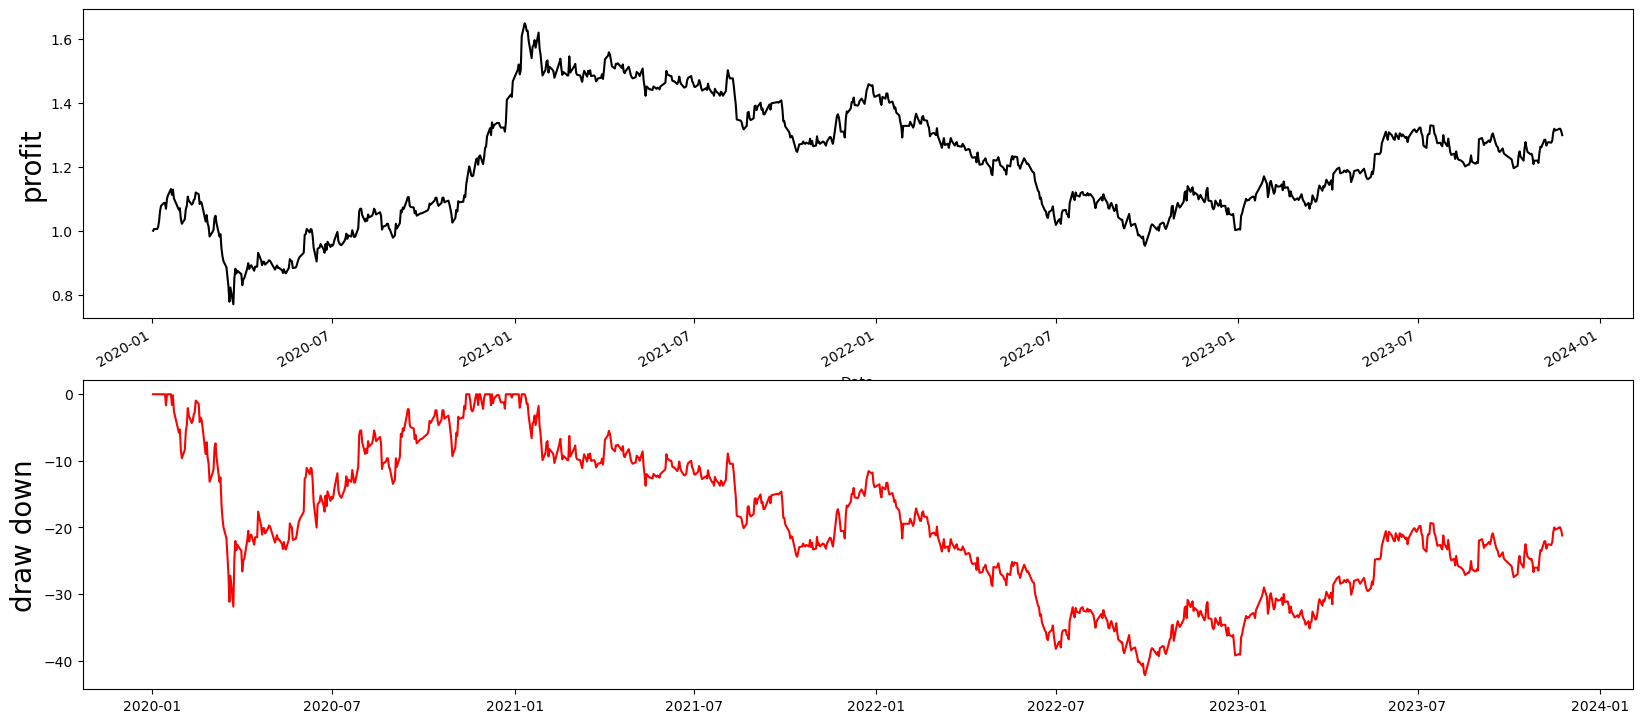

In [29]:
# 시각화
plt.figure(figsize=(20, 10))

# 수익곡선
plt.subplot(2, 1, 1)
samsungCumulativeReturn.plot(color="black")
plt.ylabel("profit", fontsize=20)

# 낙폭곡선
plt.subplot(2, 1, 2)
plt.plot(-samsungDd, color="red")
plt.ylabel("draw down", fontsize=20)
plt.show()

### 5개 종목 분산 투자 성과와 누적 수익률 곡선

5개 종목 종가를 하나의 데이터 프레임으로 합치기

In [28]:
stocks = [samsung, kakao, sk, naver, hyundai]
data = pd.DataFrame()

for stock in stocks:
    data = pd.concat([data, stock["Close"]], axis = 1)

data.columns = ["samsung", "kakao", "sk", "naver", "hyundai"]
data

,samsung,kakao,sk,naver,hyundai
2020-01-02,55200,30609,94700,182500,118000
2020-01-03,55500,30609,94500,181500,116000
2020-01-06,55500,31010,94300,180500,116000
2020-01-07,55800,32114,94000,187000,115500
2020-01-08,56800,32014,97400,183000,112000
...,...,...,...,...,...
2023-11-20,72700,47800,131400,202500,183600
2023-11-21,72800,49250,132000,204500,184200
2023-11-22,72800,50300,131300,207500,183000
2023-11-23,72400,50300,130100,205500,184800


### 다중 종목의 수익률을 계산하는 원리
[링크](https://sprinkle-guide-797.notion.site/4f7f60695edc4cebbfe568d442d0627a)
p1 = 1.04a + 0.98b
p2 = 0.99a + 1.02b

* 일반화 : 포트폴리오 누적수익률 = ∑ (개별자산 누적수익률 x 자산 비중) 

## 누적 수익률 계산 

In [33]:
# 개별 자산 일별 수익률
dayReturn = (data / data.shift(1)).fillna(1)
print(dayReturn)

             samsung     kakao        sk     naver   hyundai
2020-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
2020-01-03  1.005435  1.000000  0.997888  0.994521  0.983051
2020-01-06  1.000000  1.013101  0.997884  0.994490  1.000000
2020-01-07  1.005405  1.035601  0.996819  1.036011  0.995690
2020-01-08  1.017921  0.996886  1.036170  0.978610  0.969697
...              ...       ...       ...       ...       ...
2023-11-20  1.002759  1.006316  1.011547  1.002475  0.995662
2023-11-21  1.001376  1.030335  1.004566  1.009877  1.003268
2023-11-22  1.000000  1.021320  0.994697  1.014670  0.993485
2023-11-23  0.994505  1.000000  0.990861  0.990361  1.009836
2023-11-24  0.990331  1.003976  0.983859  1.000000  0.995671

[964 rows x 5 columns]


In [34]:
# 개별 자산 누적 수익률
cumReturn = data / data.iloc[0]
print(cumReturn)

             samsung     kakao        sk     naver   hyundai
2020-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
2020-01-03  1.005435  1.000000  0.997888  0.994521  0.983051
2020-01-06  1.005435  1.013101  0.995776  0.989041  0.983051
2020-01-07  1.010870  1.049169  0.992608  1.024658  0.978814
2020-01-08  1.028986  1.045902  1.028511  1.002740  0.949153
...              ...       ...       ...       ...       ...
2023-11-20  1.317029  1.561632  1.387540  1.109589  1.555932
2023-11-21  1.318841  1.609004  1.393875  1.120548  1.561017
2023-11-22  1.318841  1.643308  1.386484  1.136986  1.550847
2023-11-23  1.311594  1.643308  1.373812  1.126027  1.566102
2023-11-24  1.298913  1.649842  1.351637  1.126027  1.559322

[964 rows x 5 columns]


In [36]:
# 포트폴리오 비율 : 동일 가중
portWeight = [1/len(data.columns)] * len(data.columns)
portWeight

[0.2, 0.2, 0.2, 0.2, 0.2]

In [39]:
# 누적 수익률
portCumReturn = (portWeight * cumReturn).sum(axis=1)
print(portCumReturn) 

2020-01-02    1.000000
2020-01-03    0.996179
2020-01-06    0.997281
2020-01-07    1.011223
2020-01-08    1.011058
                ...   
2023-11-20    1.386344
2023-11-21    1.400657
2023-11-22    1.407293
2023-11-23    1.404169
2023-11-24    1.397148
Length: 964, dtype: float64


## 일간 수익률

### 간단한 방법 -> 역연산

In [38]:
portDayReturn = (portCumReturn / portCumReturn.shift(1)).fillna(1)
portDayReturn

2020-01-02    1.000000
2020-01-03    0.996179
2020-01-06    1.001106
2020-01-07    1.013981
2020-01-08    0.999836
                ...   
2023-11-20    1.003652
2023-11-21    1.010324
2023-11-22    1.004738
2023-11-23    0.997780
2023-11-24    0.995000
Length: 964, dtype: float64

**분산투자 포트폴리오와 개별 종목 투자 결과 비교**

In [41]:
# 개별 자산 누적수익률
print(cumReturn)

             samsung     kakao        sk     naver   hyundai
2020-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
2020-01-03  1.005435  1.000000  0.997888  0.994521  0.983051
2020-01-06  1.005435  1.013101  0.995776  0.989041  0.983051
2020-01-07  1.010870  1.049169  0.992608  1.024658  0.978814
2020-01-08  1.028986  1.045902  1.028511  1.002740  0.949153
...              ...       ...       ...       ...       ...
2023-11-20  1.317029  1.561632  1.387540  1.109589  1.555932
2023-11-21  1.318841  1.609004  1.393875  1.120548  1.561017
2023-11-22  1.318841  1.643308  1.386484  1.136986  1.550847
2023-11-23  1.311594  1.643308  1.373812  1.126027  1.566102
2023-11-24  1.298913  1.649842  1.351637  1.126027  1.559322

[964 rows x 5 columns]


samsung
cagr: 1.0707573340032983
mdd: 42.1978021978022
kakao
cagr: 1.139834365275417
mdd: 77.81710914454277
sk
cagr: 1.0819525462831845
mdd: 49.494949494949495
naver
cagr: 1.031514776394851
mdd: 65.08810572687224
hyundai
cagr: 1.1231441611238406
mdd: 51.54411764705882
portfolio
cagr: 1.0913597842752598
mdd: 54.41008703120628


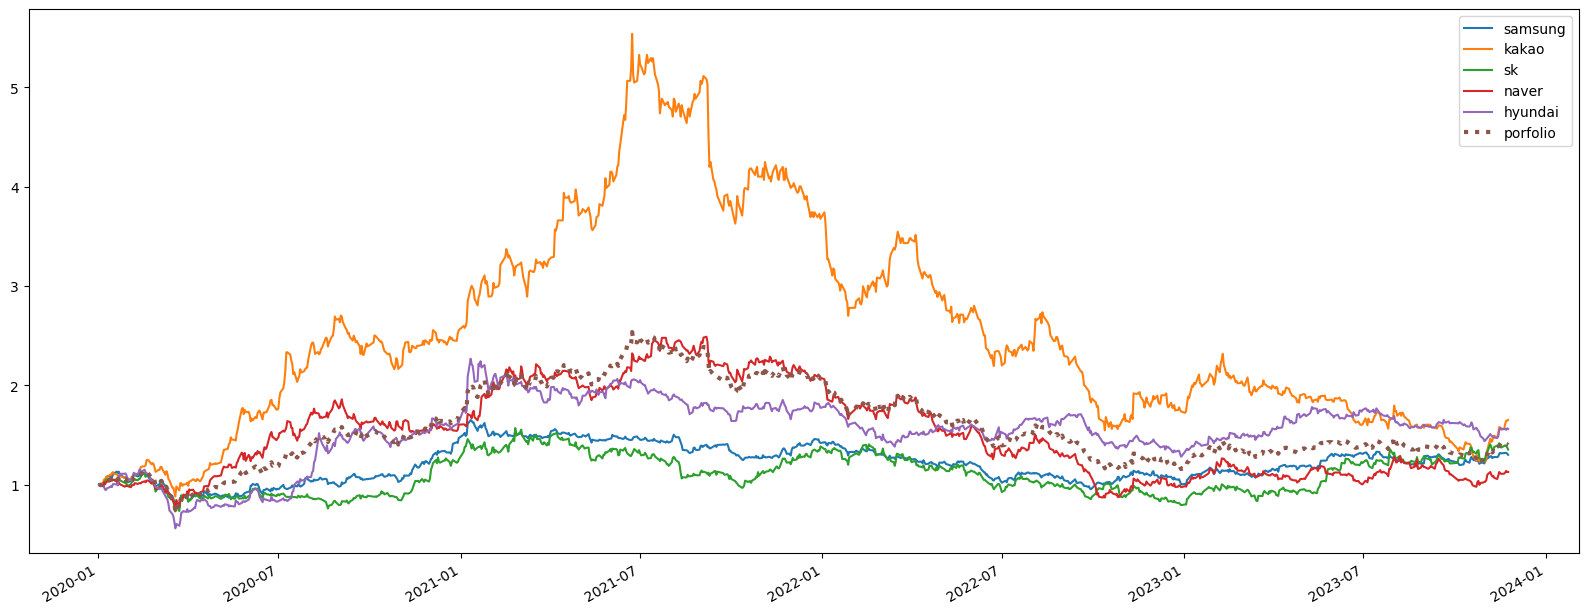

In [42]:
plt.figure(figsize=(20, 8))

for stock in cumReturn.columns:
    # 그래프
    cumReturn[stock].plot(label=stock)
    # cagr
    cagr = cumReturn[stock].iloc[-1] ** (252/len(cumReturn[stock]))
    # mdd
    dd = (cumReturn[stock].cummax() - cumReturn[stock]) / cumReturn[stock].cummax() * 100
    mdd= dd.max()

    print(stock)
    print(f"cagr: {cagr}\nmdd: {mdd}")
    print("=======")



# cagr
cagr = portCumReturn.iloc[-1] ** (252/len(portCumReturn))
# mdd
dd = (portCumReturn.cummax() - portCumReturn) / portCumReturn.cummax() * 100
mdd= dd.max()

print("portfolio")
print(f"cagr: {cagr}\nmdd: {mdd}")
print("=======")

portCumReturn.plot(label = "porfolio", linestyle="dotted", linewidth=3)
plt.legend()
plt.show()

### 안 간단한 방법 -> 비율 계산

In [40]:
# 자산별 비중이 반영된 자산 흐름
weightedCumReturn = portWeight * cumReturn
print(weightedCumReturn)

             samsung     kakao        sk     naver   hyundai
2020-01-02  0.200000  0.200000  0.200000  0.200000  0.200000
2020-01-03  0.201087  0.200000  0.199578  0.198904  0.196610
2020-01-06  0.201087  0.202620  0.199155  0.197808  0.196610
2020-01-07  0.202174  0.209834  0.198522  0.204932  0.195763
2020-01-08  0.205797  0.209180  0.205702  0.200548  0.189831
...              ...       ...       ...       ...       ...
2023-11-20  0.263406  0.312326  0.277508  0.221918  0.311186
2023-11-21  0.263768  0.321801  0.278775  0.224110  0.312203
2023-11-22  0.263768  0.328662  0.277297  0.227397  0.310169
2023-11-23  0.262319  0.328662  0.274762  0.225205  0.313220
2023-11-24  0.259783  0.329968  0.270327  0.225205  0.311864

[964 rows x 5 columns]
